In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import statsmodels as st

In [2]:
dd=pd.read_csv(r'F:\VIRU\New folder\SWEDEN.csv')

In [3]:
dd.head()

,months,sales
0,2012-01,1
1,2012-02,2
2,2012-03,8
3,2012-04,1
4,2012-05,3


In [4]:
dd.tail()

,months,sales
103,2020-08,586
104,2020-09,1144
105,2020-10,103
106,2020-11,421
107,2020-12,1810


In [5]:
dd['months']=pd.to_datetime(dd['months'])

In [6]:
dd.set_index('months',inplace=True)

<AxesSubplot:xlabel='months'>

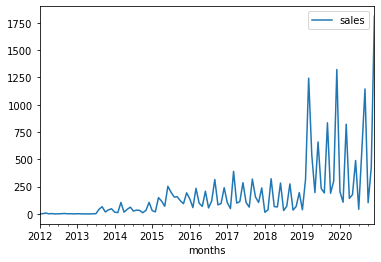

In [7]:
dd.plot()

In [8]:
from statsmodels.tsa.stattools import adfuller

In [9]:
dfuler = adfuller(dd['sales'])

In [10]:
dfuler
#p value <0.05 indicates stationary
#p value >0.05 indicates non stationary

(0.9051482192199861,
 0.9931571455201809,
 11,
 96,
 {'1%': -3.5003788874873405,
  '5%': -2.8921519665075235,
  '10%': -2.5830997960069446},
 1217.1100524142817)

In [11]:
import statsmodels.api as sm

from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot

In [12]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

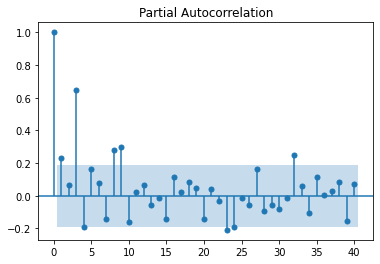

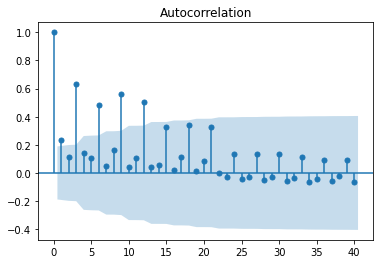

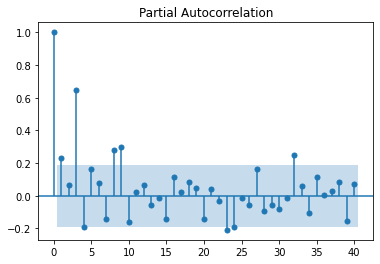

In [13]:
plot_acf(dd['sales'],lags=40)
plot_pacf(dd['sales'],lags=40)

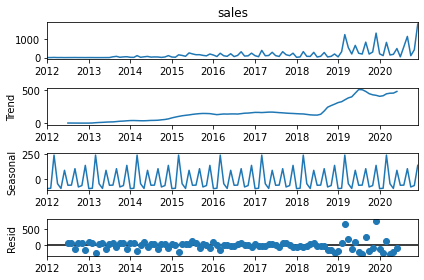

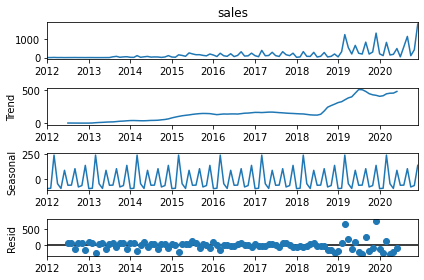

In [14]:
import statsmodels
decompose= statsmodels.tsa.seasonal.seasonal_decompose(dd['sales'])
decompose.plot()

In [15]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [16]:
import statsmodels.api as sm

In [48]:
models = sm.tsa.statespace.SARIMAX(dd['sales'],order=(9,0,0),seasonal_order=(2,0,0,12))
results=models.fit()

c:\users\personal\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\personal\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\personal\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\personal\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting paramete

In [49]:
dd['forecast']=results.predict(start=97,end=107,dynamic=True)

<AxesSubplot:xlabel='months'>

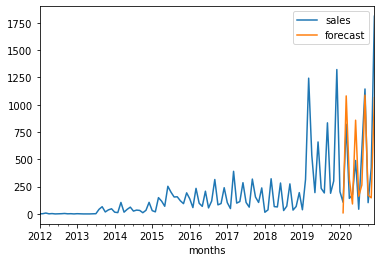

In [50]:
dd[['sales','forecast']].plot()

In [53]:
output = results.forecast(24)

In [54]:
output

2021-01-01     631.902205
2021-02-01     208.210601
2021-03-01    1166.617269
2021-04-01     487.982704
2021-05-01     438.055285
2021-06-01    1020.526442
2021-07-01     131.025813
2021-08-01     480.793888
2021-09-01    1492.656865
2021-10-01     402.906147
2021-11-01     330.982440
2021-12-01    1377.066894
2022-01-01     513.395545
2022-02-01     402.295032
2022-03-01    1077.447932
2022-04-01     271.253991
2022-05-01     473.394571
2022-06-01    1194.202030
2022-07-01     281.453973
2022-08-01     439.254062
2022-09-01    1285.166560
2022-10-01     424.183535
2022-11-01     446.839774
2022-12-01    1232.196106
Freq: MS, Name: predicted_mean, dtype: float64

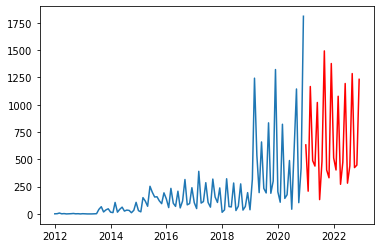

In [55]:
pyplot.plot(dd['sales'])
pyplot.plot(output,color='red')

In [56]:
from pandas.tseries.offsets import DateOffset

In [57]:
future_dates=[dd.index[-1]+DateOffset(months=x) for x in range(0,24)]

In [58]:
future_dates_dd = pd.DataFrame(index=future_dates[1:],columns=dd.columns)

In [59]:
future_dates_dd.tail()

,sales,forecast
2022-07-01,NaN,NaN
2022-08-01,NaN,NaN
2022-09-01,NaN,NaN
2022-10-01,NaN,NaN
2022-11-01,NaN,NaN


In [60]:
future_dd=pd.concat([dd,future_dates_dd])

In [61]:
future_dd['forecast']=results.predict(start=106,end=131,dynamic=True)

<AxesSubplot:>

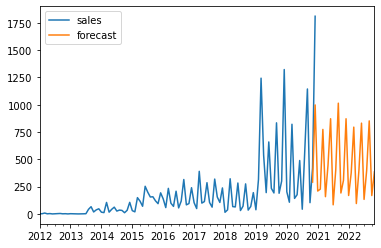

In [62]:
future_dd[['sales','forecast']].plot()